In [2]:
# importing tool functions
import numpy as np
import matplotlib.pyplot as plt
from tools import utils, ml_tools
import pandas as pd
import numpy as np

In [3]:
# machine learning imports
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils

In [4]:
# graphing tools
import seaborn as sns
from scipy.stats import sem
import matplotlib
import scienceplots

plt.style.use(['science', 'ieee','no-latex'])
matplotlib.rc('font', family='times new roman')

# time
import time 

In [5]:
# LTSM
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Bidirectional
# fix random seed for reproducibility
tf.random.set_seed(7)

In [6]:
dir_name_e = r'C:\Users\EfiaA\OneDrive - Imperial College London\Imperial academic work\University life\Y4\MSci project\Project_Coding\nlp-physicseducation\Pickledfiles'

# Year 1 & 2 Data

### 1. Import the year 1 & 2 Data

In [7]:
# import the yr2 labels
dir_csv3 = 'outputs/labels_cleaned_y1y2.csv'
df3 = pd.read_csv(dir_csv3, encoding='utf-8')

### 1.1 Apply TF-IDF on year 1 & 2 Data

In [8]:
# Epistemology (Reasoning Level)

# X_data -> Content of Lab report
X_y1y2_tf_rl             = np.array(ml_tools.tf_idf(df3['Content'].tolist()), dtype = object) # object
X_y1y2_tf_rl               = X_y1y2_tf_rl [1]
print(X_y1y2_tf_rl.shape)

# y_data ->  Epistemology label 
y_y1y2_tf_rl = df3['ReasoningLevel'].tolist() # list
lb           = LabelBinarizer()
lb.fit(y_y1y2_tf_rl )
y_y1y2_tf_rl  = lb.transform(y_y1y2_tf_rl )


(178, 7563)


In [9]:
# Argument Level

# X_data -> same as above
X_y1y2_tf_al               = X_y1y2_tf_rl
print(X_y1y2_tf_al.shape)

# y_data -> argument level
y_y1y2_tf_al = np.array(df3['ArgumentLevel'].tolist(), dtype = object)
lb = LabelBinarizer()
lb.fit(y_y1y2_tf_al)
y_y1y2_tf_al= lb.transform(y_y1y2_tf_al)



(178, 7563)


### 1.2 Apply BOW on year 1 & 2 Data

In [10]:
# Epistemology (Reasoning Level)

# X_data -> Content of Lab report 
wordvec_names, X_y1y2_bow_rl = ml_tools.BoW(df3['Content'].tolist())

# y_data -> Epistemology label 
y_y1y2_bow_rl = df3['ReasoningLevel'].tolist()
lb = LabelBinarizer()
lb.fit(y_y1y2_bow_rl )
y_y1y2_bow_rl  = lb.transform(y_y1y2_bow_rl )

In [11]:
# Argument Level

# X_data -> Content of Lab report 
X_y1y2_bow_al       = X_y1y2_bow_rl

# y_data -> Argument level labels 
y_y1y2_bow_al      = df3['ArgumentLevel'].tolist()
lb                 = LabelBinarizer()
lb.fit(y_y1y2_bow_al)
y_y1y2_bow_al      = lb.transform(y_y1y2_bow_al)

# Neural Network Function

In [12]:
# Standard Neural Network

def NN(model1, input1, ephs, X_t, y_t, X_test, y_test):
    maxlen = 100 
    model = model1
    model.add(layers.Dense(12, input_dim = input, activation  = 'relu'))
    model.add(layers.Dense(8, input_dim = input, activation  = 'relu'))
    model.add(layers.Dense(1,activation = 'sigmoid'))
    model.add(layers.Flatten())
    model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])
    model.build(input1)
    model.summary()
    history = model.fit(X_t,y_t,epochs = ephs, verbose=True, validation_data=(X_test, y_test), batch_size=30 )
    return history


embedding_vecor_length = 32
top_words = 5000

def LTSM(model1, input1, ephs, X_t, y_t, X_test, y_test):
    maxlen = 100 
    model = model1
    model.add(Embedding(5000, 32, input_length=input1))
    model.add(Bidirectional(LSTM(100, dropout=0.2, recurrent_dropout=0.2)))
    model.add(Dense(1, activation='sigmoid'))
    model.add(layers.Flatten())
    model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])
    model.build(input1)
    model.summary()
    history = model.fit(X_t,y_t,epochs = ephs, verbose=True, validation_data=(X_test, y_test), batch_size=30 )
    return history

def LTSM_data(X, y,t_size,epoch_no, str_dataname,str_featext, str_year, dir):
    accuracies = []
    accuracies_sem = []
    loss = []
    dummy = []
    dummy_loss = []
    for i in t_size:
        X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y , train_size = i)
        input = X_train_b.shape[1]
        #input = len(y_train_b)
        nn1 = LTSM(Sequential(), input, epoch_no, X_train_b, y_train_b, X_test_b, y_test_b)
        dummy.append(nn1.history['accuracy'])
        dummy_loss.append(nn1.history['loss'])


    for array in dummy:
        accuracies.append(np.sum(array)/len(array))
        accuracies_sem.append(sem(array))
    
    for array in dummy_loss:
        loss.append(np.sum(array)/len(array))

    dict_rl = {'trainsize':t_size, 'accuracy':accuracies, 'sem': accuracies_sem, 'loss':loss}
    acc_rl_bow = pd.DataFrame(dict_rl)
    utils.save_as_pickle_file(acc_rl_bow,'NN_{}_{}_{}_{}ephs_recent'. format(str_year, str_featext,str_dataname,'1000'), dir)
    #name = 'NN_{}_{}_trainsize_accuracy_sem_{}ephs_{}'. format(str_dataname,str_featext,'1000', str_year)
    return acc_rl_bow


def NN_dataframe(X, y, epoch_no, tratio):
    accuracies = []
    accuracies_std = []
    loss = []
    dummy = []
    dummy_loss = []
    start_time = time.time()
    print(start_time)
   
    X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y , train_size = tratio)
    input = X_train_b.shape[1]
    nn1 = NN(Sequential(), input, epoch_no, X_train_b, y_train_b, X_test_b, y_test_b)
    dummy.append(nn1.history['accuracy'])
    loss.append(nn1.history['loss'])

    dictionary = {'accuracy':dummy, 'loss':loss}
    Dataframe = pd.DataFrame(dictionary)
    totaltime = time.time() - start_time
    return Dataframe



def NN_data(X, y,t_size,epoch_no, str_dataname,str_featext, str_year, dir):
    accuracies = []
    accuracies_sem = []
    loss = []
    dummy = []
    dummy_loss = []
    for i in t_size:
        X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y , train_size = i)
        input = X_train_b.shape[1]
        #input = len(y_train_b)
        nn1 = NN(Sequential(), input, epoch_no, X_train_b, y_train_b, X_test_b, y_test_b)
        dummy.append(nn1.history['accuracy'])
        dummy_loss.append(nn1.history['loss'])


    for array in dummy:
        accuracies.append(np.sum(array)/len(array))
        accuracies_sem.append(sem(array))
    
    for array in dummy_loss:
        loss.append(np.sum(array)/len(array))

    dict_rl = {'trainsize':t_size, 'accuracy':accuracies, 'sem': accuracies_sem, 'loss':loss}
    acc_rl_bow = pd.DataFrame(dict_rl)
    utils.save_as_pickle_file(acc_rl_bow,'NN_{}_{}_{}_{}ephs_recent'. format(str_year, str_featext,str_dataname,'1000'), dir)
    #name = 'NN_{}_{}_trainsize_accuracy_sem_{}ephs_{}'. format(str_dataname,str_featext,'1000', str_year)
    return acc_rl_bow

def plot(dframe_train, dframe_acc, dframe_sem):
    plt.plot(dframe_train, dframe_acc, 'o')
    plt.errorbar(dframe_train, dframe_acc, yerr = dframe_sem, markersize=0.5, capsize=3, elinewidth=1, color= 'black' )
    plt.xlabel(' Training size')
    plt.ylabel('Accuracy score')

    # save figure 
    # filepath = 'outputs/NN-RL-BOW-1000ephs_NEW'
    # plt.savefig(filepath)
    return




### 2.1 Epistomology - TFIDF

In [13]:
# train and split the data
# Choose a 0.7 train size
# 5000
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_y1y2_tf_rl, y_y1y2_tf_rl , train_size = 0.7)
input = X_train_t.shape[1]
print(input)


7563


In [133]:
# Training the neural network

ephs = 1000 #no of epochs 
train_sizes = [0.5,0.6,0.7,0.8,0.9] 

# str_dataname,str_featext, str_year, dir
from time import time

start = time() # start time

# train nn for: Epistemology (reasoning level) data - bow - y1y2
Epist_data_tf_rl = NN_data(X_y1y2_tf_rl, y_y1y2_tf_rl,train_sizes,ephs, 'EPISTEMOLOGY', 'TFIDF', 'y1y2', dir_name_e )
print('Time- NN_bow_rl_y1y2:', time() - start) 

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_103 (Dense)           (None, 12)                90768     
                                                                 
 dense_104 (Dense)           (None, 8)                 104       
                                                                 
 dense_105 (Dense)           (None, 1)                 9         
                                                                 
 flatten_35 (Flatten)        (None, 1)                 0         
                                                                 
Total params: 90,881
Trainable params: 90,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [==============================] - 1s 168ms/step - loss: 0.6863 - accuracy: 0.7500 - val_loss: 0.6774 - val_accuracy: 0.7500
Epoch 2/1000
3/3 [=====================

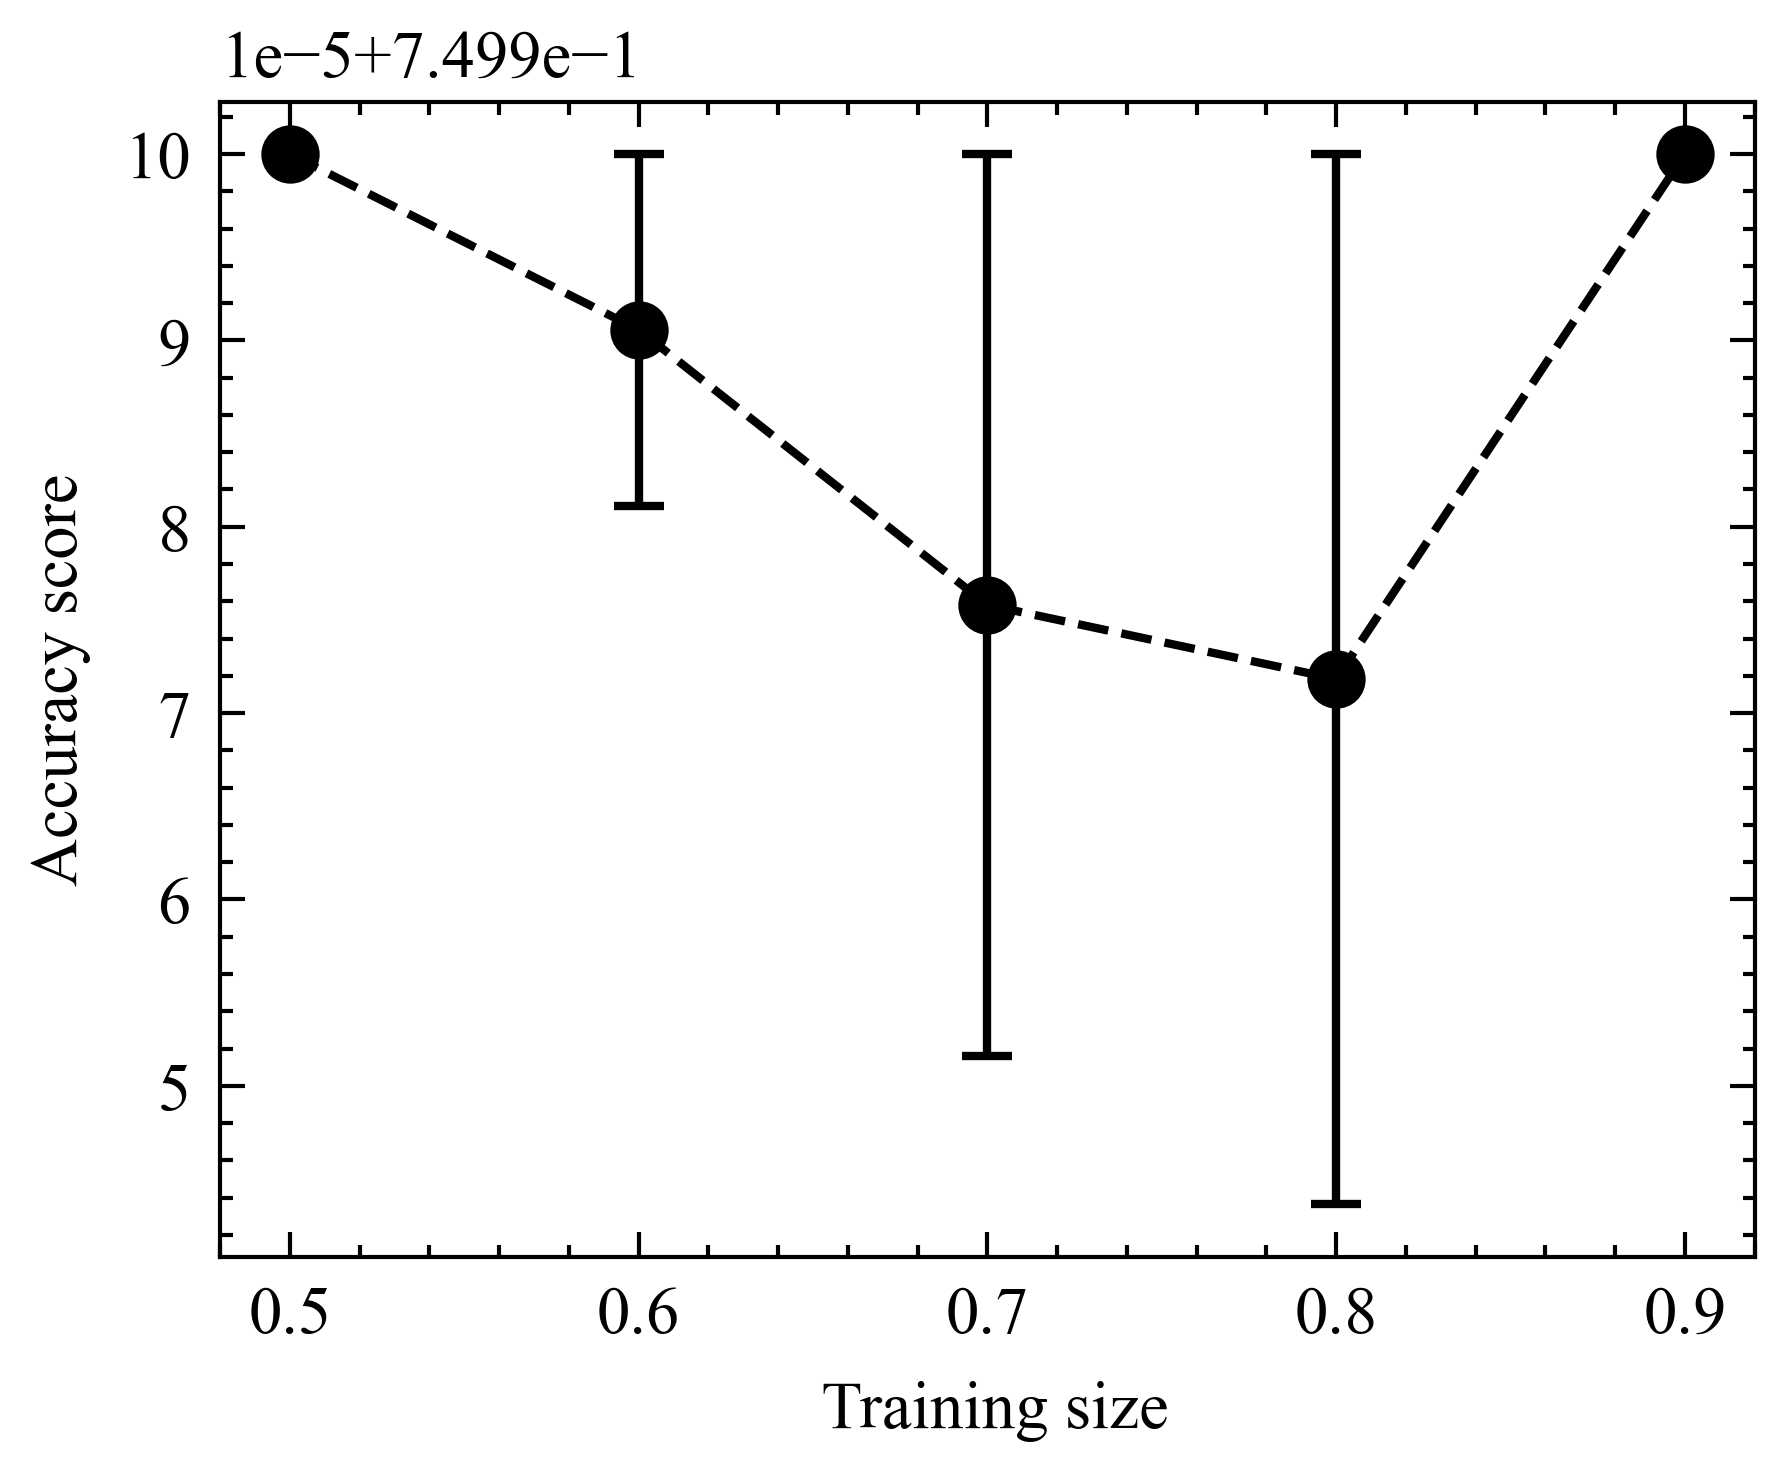

In [154]:

df_unpic_epist_tf_rl = utils.load_pickle_file_to_df('NN_y1y2_TFIDF_EPISTEMOLOGY_1000ephs_recent', dir_name_e)
plot(df_unpic_epist_tf_rl['trainsize'], df_unpic_epist_tf_rl['accuracy'], df_unpic_epist_tf_rl['sem'])

### 2.2 Epistomology - BOW

In [138]:
# str_dataname,str_featext, str_year, dir
from time import time

start = time() # start time

# train nn for: Epistemology (reasoning level) data - bow - y1y2
Epist_data_bow_rl = NN_data(X_y1y2_bow_rl, y_y1y2_bow_rl,train_sizes,ephs, 'EPISTEMOLOGY', 'BOW', 'y1y2', dir_name_e)
print('Time- NN_bow_rl_y1y2:', time() - start) 

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_118 (Dense)           (None, 12)                90768     
                                                                 
 dense_119 (Dense)           (None, 8)                 104       
                                                                 
 dense_120 (Dense)           (None, 1)                 9         
                                                                 
 flatten_40 (Flatten)        (None, 1)                 0         
                                                                 
Total params: 90,881
Trainable params: 90,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [==============================] - 2s 208ms/step - loss: 1.5494 - accuracy: 0.4691 - val_loss: 0.9516 - val_accuracy: 0.7500
Epoch 2/1000
3/3 [=====================

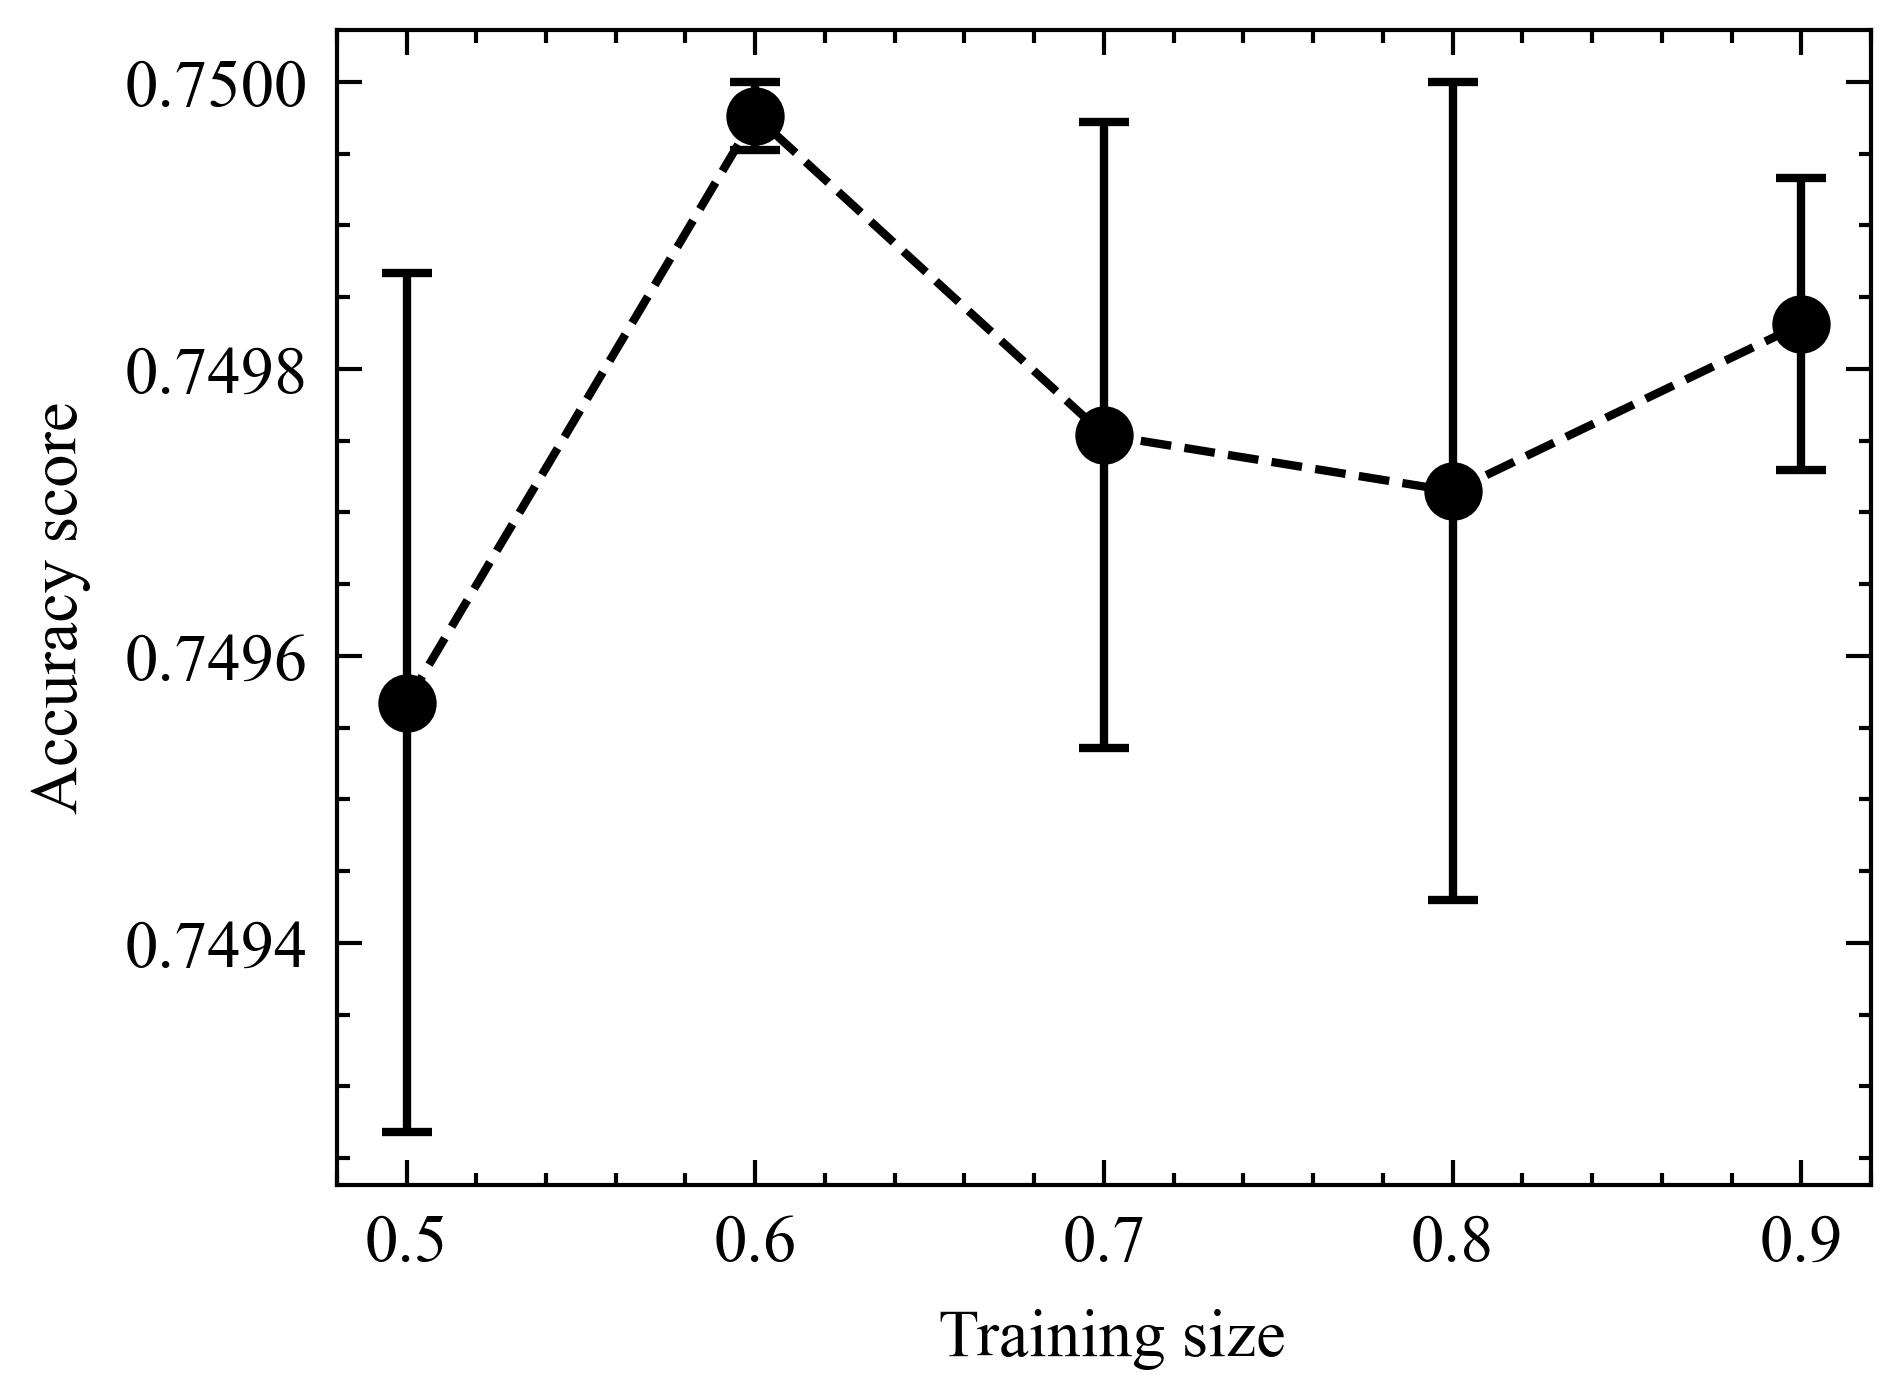

In [160]:
df_unpic_epist_bow_rl = utils.load_pickle_file_to_df('NN_y1y2_BOW_EPISTEMOLOGY_1000ephs_recent', dir_name_e)
plot(df_unpic_epist_bow_rl['trainsize'], df_unpic_epist_bow_rl['accuracy'], df_unpic_epist_bow_rl['sem'])

### 2.3 Argument Level - TFIDF

In [178]:
# str_dataname,str_featext, str_year, dir
from time import time

start = time() # start time
Arg_data_tfidf = NN_data(X_y1y2_tf_al, y_y1y2_tf_al, train_sizes, ephs, 'ARGUMENTLEVEL', 'TFIDF', 'y1y2', dir_name_e)
print('Time- NN_bow_rl_y1y2:', time() - start) 


Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_157 (Dense)           (None, 12)                90768     
                                                                 
 dense_158 (Dense)           (None, 8)                 104       
                                                                 
 dense_159 (Dense)           (None, 1)                 9         
                                                                 
 flatten_53 (Flatten)        (None, 1)                 0         
                                                                 
Total params: 90,881
Trainable params: 90,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [==============================] - 1s 130ms/step - loss: 0.6938 - accuracy: 0.3955 - val_loss: 0.6914 - val_accuracy: 0.8000
Epoch 2/1000
3/3 [=====================

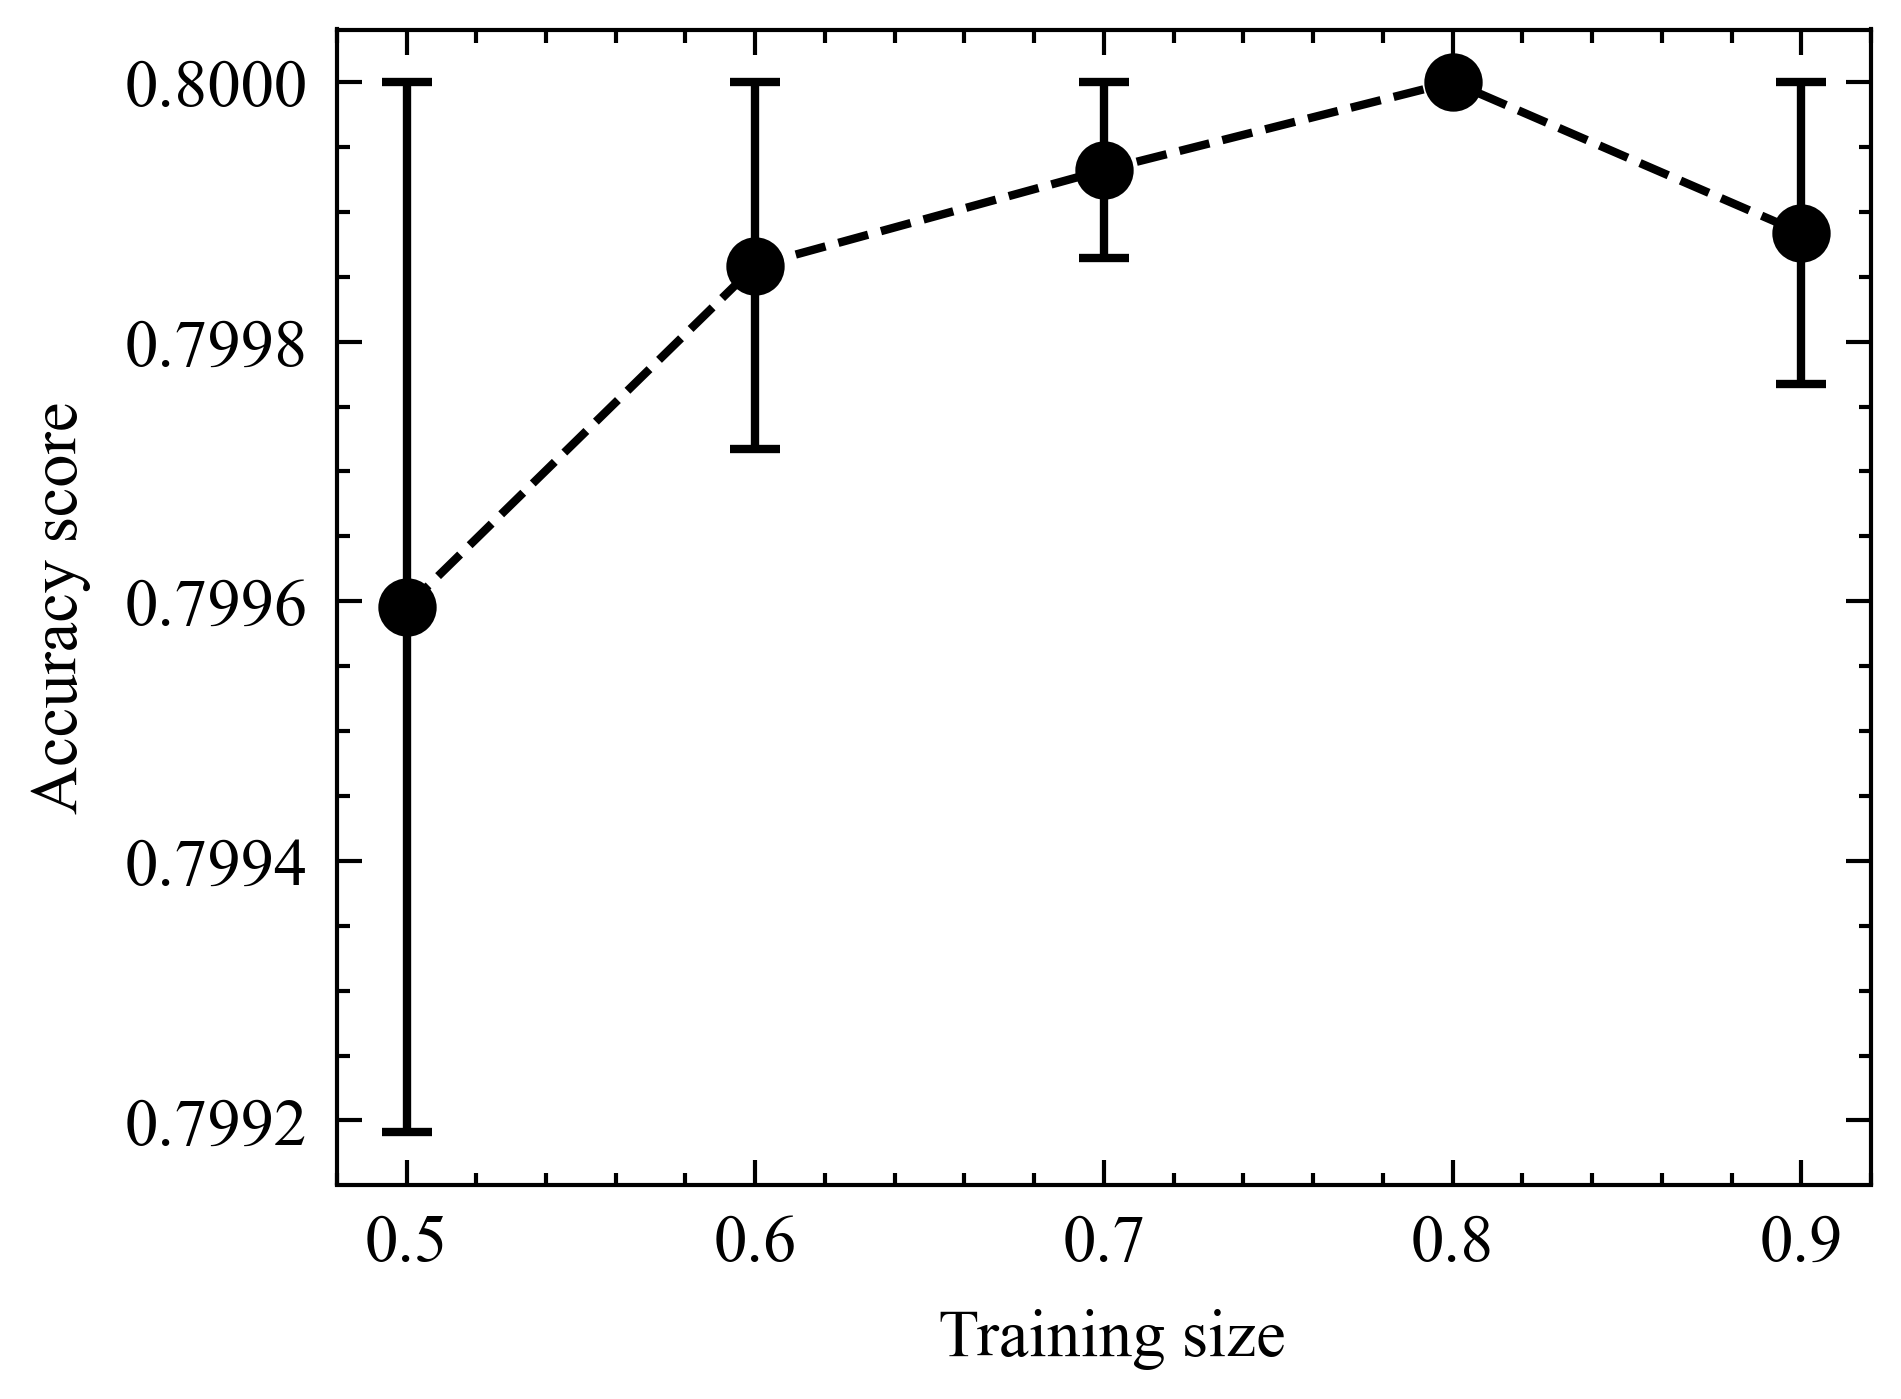

In [179]:
df_unpic_arg_tfidf_al = utils.load_pickle_file_to_df('NN_y1y2_TFIDF_ARGUMENTLEVEL_1000ephs_recent', dir_name_e)
plot(df_unpic_arg_tfidf_al['trainsize'], df_unpic_arg_tfidf_al['accuracy'],df_unpic_arg_tfidf_al['sem'])

### 2.4 Argument Level - BOW

In [177]:
# str_dataname,str_featext, str_year, dir
from time import time

start = time() # start time
Arg_data_bow = NN_data(X_y1y2_bow_al, y_y1y2_bow_al,train_sizes, ephs, 'ARGUMENTLEVEL', 'BOW', 'y1y2', dir_name_e)
print('Time- NN_tf_al_y1y2:', time() - start) 

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_154 (Dense)           (None, 12)                90768     
                                                                 
 dense_155 (Dense)           (None, 8)                 104       
                                                                 
 dense_156 (Dense)           (None, 1)                 9         
                                                                 
 flatten_52 (Flatten)        (None, 1)                 0         
                                                                 
Total params: 90,881
Trainable params: 90,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [==============================] - 1s 164ms/step - loss: 0.6343 - accuracy: 0.7596 - val_loss: 0.5926 - val_accuracy: 0.8000
Epoch 2/1000
3/3 [=====================

KeyboardInterrupt: 

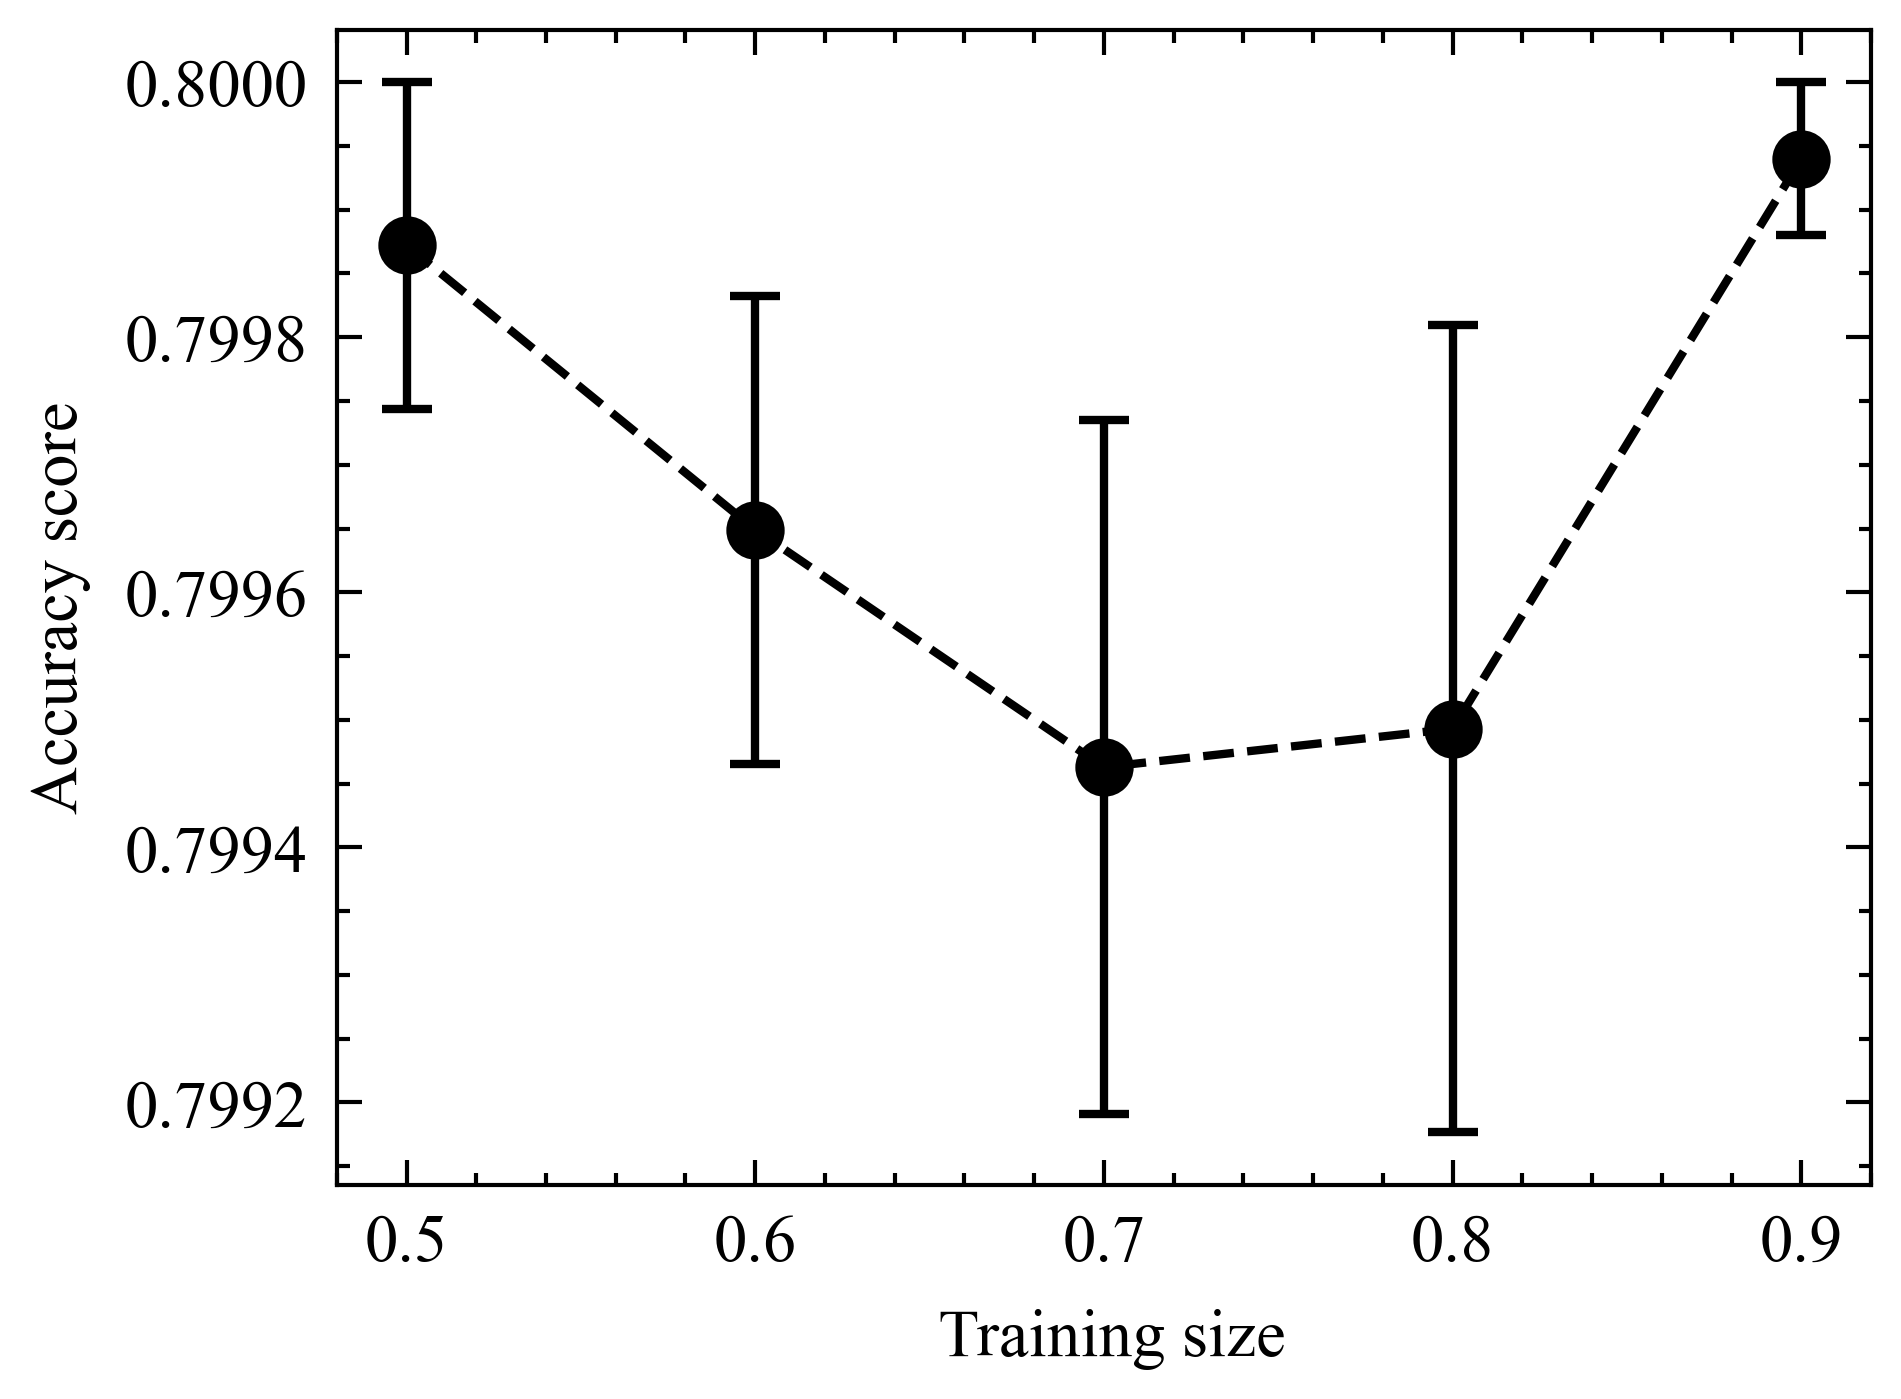

In [161]:
df_unpic_arg_bow_rl = utils.load_pickle_file_to_df('NN_y1y2_BOW_ARGUMENTLEVEL_1000ephs_recent', dir_name_e)
plot(df_unpic_arg_bow_rl['trainsize'], df_unpic_arg_bow_rl['accuracy'], df_unpic_arg_bow_rl['sem'])

# All Y1 & Y2 Feature Extracted Data

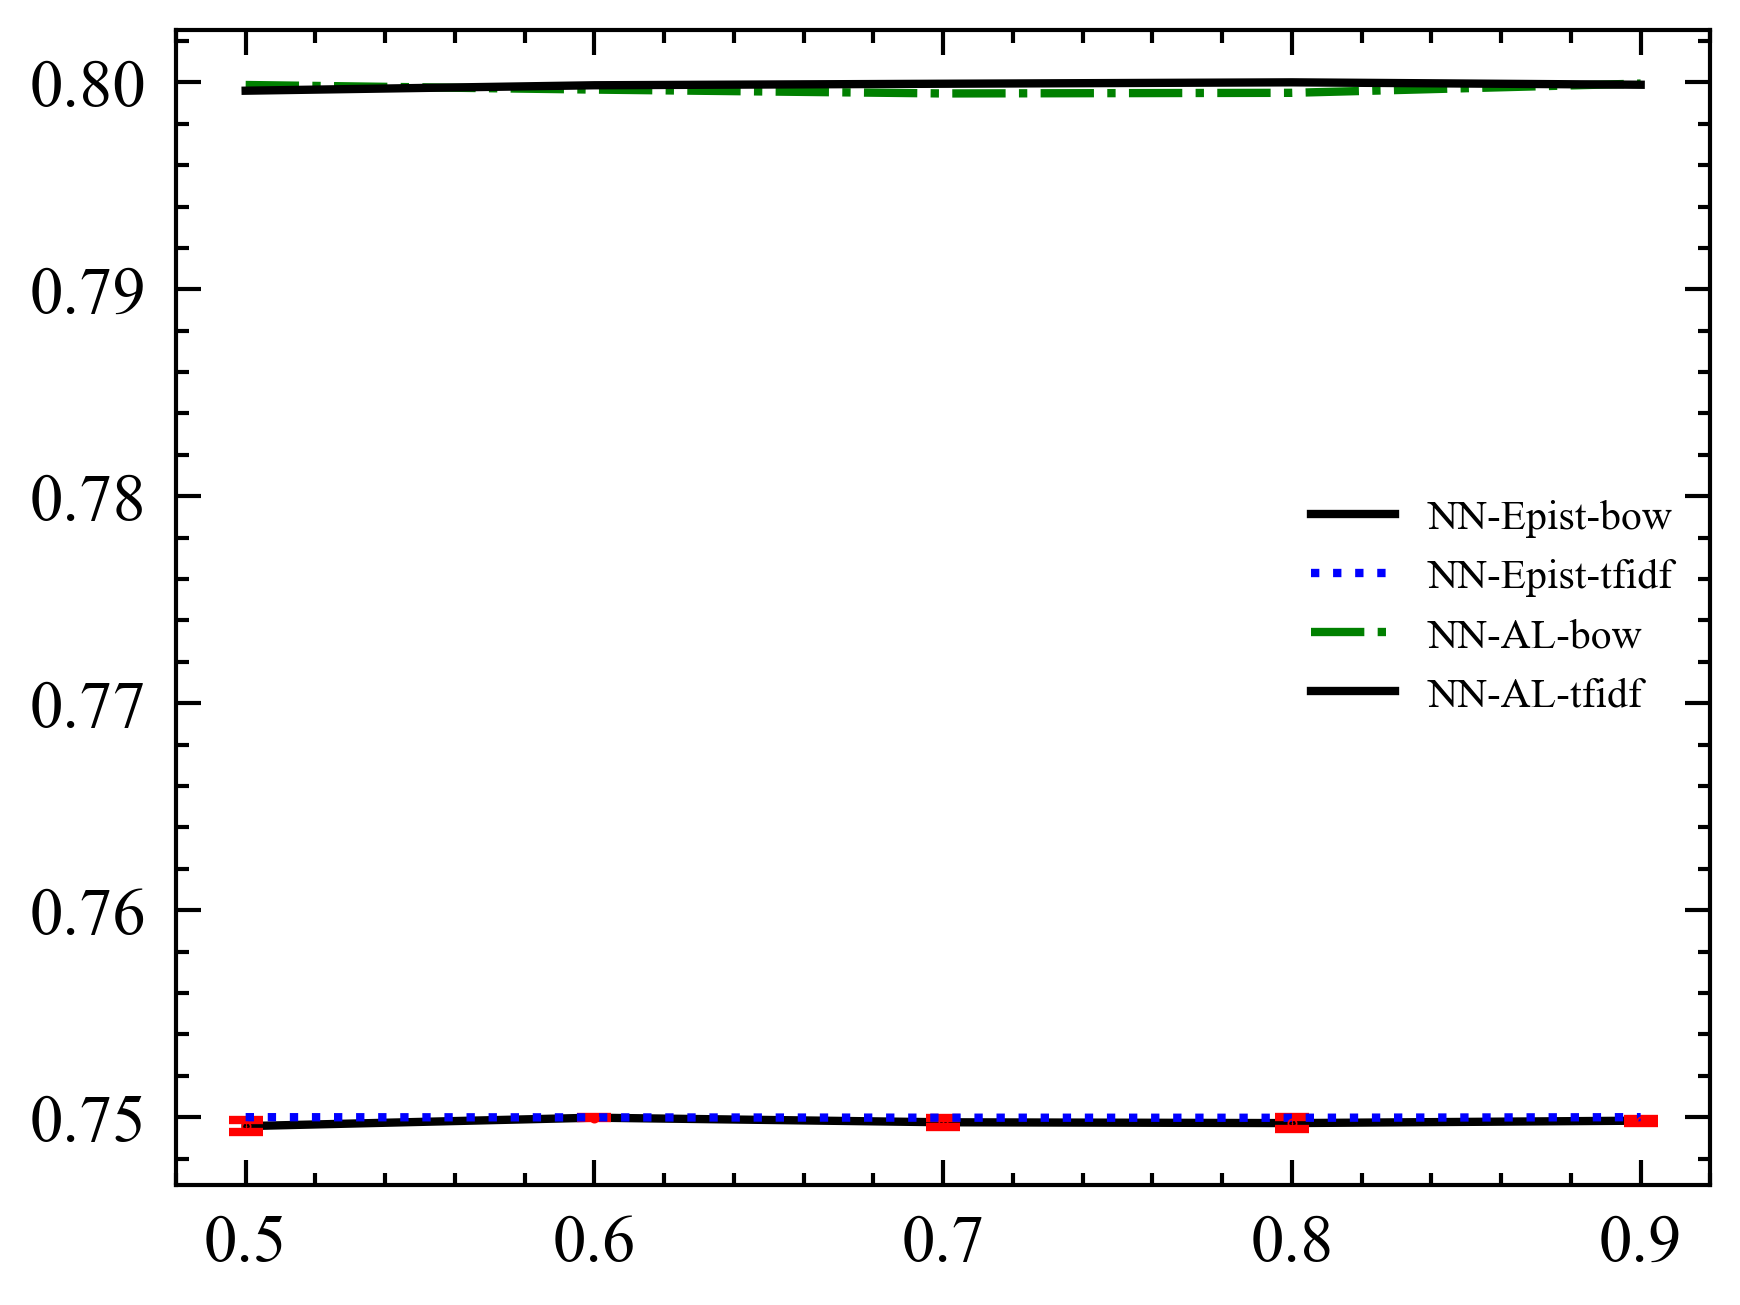

In [187]:
plt.plot(df_unpic_epist_bow_rl['trainsize'], df_unpic_epist_bow_rl['accuracy'], label = 'NN-Epist-bow')
plt.errorbar(df_unpic_epist_bow_rl['trainsize'], df_unpic_epist_bow_rl['accuracy'], yerr = df_unpic_epist_bow_rl['sem'], fmt = 'o',  markersize=0.2, capsize=2, elinewidth=0.1)
plt.plot(df_unpic_epist_tf_rl['trainsize'],df_unpic_epist_tf_rl['accuracy'], label = 'NN-Epist-tfidf')
#plt.errorbar(df_unpic_epist_tf_rl['trainsize'], df_unpic_epist_tf_rl['accuracy'], yerr = df_unpic_epist_tf_rl['sem'], markersize=0.2, capsize=2, elinewidth=0.1)
plt.plot(df_unpic_arg_bow_rl['trainsize'], df_unpic_arg_bow_rl['accuracy'], label = 'NN-AL-bow')
#plt.errorbar(df_unpic_arg_bow_rl['trainsize'], df_unpic_arg_bow_rl['accuracy'], yerr = df_unpic_arg_bow_rl['sem'], markersize=0.2, capsize=2, elinewidth=0.1)
plt.plot(df_unpic_arg_tfidf_al['trainsize'], df_unpic_arg_tfidf_al['accuracy'], label = 'NN-AL-tfidf')
#plt.errorbar(df_unpic_arg_tfidf_al['trainsize'],df_unpic_arg_tfidf_al['accuracy'], yerr = df_unpic_arg_tfidf_al['sem'], markersize=0.2, capsize=2, elinewidth=0.1)
plt.legend(prop={'size': 5})

# NEURAL NETWORK INVESTIGATIONS

In [196]:
def NN_invest(model1, input1, ephs, X_t, y_t, X_test, y_test, node1, node2, node3):
    maxlen = 100 
    model = model1
    model.add(layers.Dense(node1, input_dim = input, activation  = 'relu'))
    model.add(layers.Dense(node2, input_dim = input, activation  = 'relu'))
    model.add(layers.Dense(node3 ,activation = 'sigmoid'))
    model.add(layers.Flatten())
    model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])
    model.build(input1)
    model.summary()
    history = model.fit(X_t,y_t,epochs = ephs, verbose=True, validation_data=(X_test, y_test), batch_size=30 )
    return history



def NN_data_invest(X, y, tsize,  epoch_no, node1, node2, node3):
    dummy = []
    dummy_loss = []
    
    X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y , train_size = tsize )
    input = X_train_b.shape[1] 

    nn1 = NN_invest(Sequential(), input, epoch_no, X_train_b, y_train_b, X_test_b, y_test_b, node1, node2, node3)
    dummy.append(nn1.history['accuracy'])
    dummy_loss.append(nn1.history['loss'])

    dict_rl = {'accuracy':dummy,  'loss':dummy_loss}
    dataframe = pd.DataFrame(dict_rl)
    #utils.save_as_pickle_file(acc_rl_bow,'NN_{}_{}_{}_{}ephs_recent'. format(str_year, str_featext,str_dataname,'1000'), dir)
    #name = 'NN_{}_{}_trainsize_accuracy_sem_{}ephs_{}'. format(str_dataname,str_featext,'1000', str_year)
    return dataframe

### 1. Changing the number of nodes

In [197]:
'''
node1: 12
node2: 8
node3: 1
'''
df_y1y2_bow_al = NN_data_invest(X_y1y2_bow_al,y_y1y2_bow_al , 0.8,  100, 12, 8, 1)


Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_172 (Dense)           (None, 12)                90768     
                                                                 
 dense_173 (Dense)           (None, 8)                 104       
                                                                 
 dense_174 (Dense)           (None, 1)                 9         
                                                                 
 flatten_58 (Flatten)        (None, 1)                 0         
                                                                 
Total params: 90,881
Trainable params: 90,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 [==============================] - 2s 102ms/step - loss: 0.6344 - accuracy: 0.7324 - val_loss: 0.5333 - val_accuracy: 0.8000
Epoch 2/100
5/5 [=======================

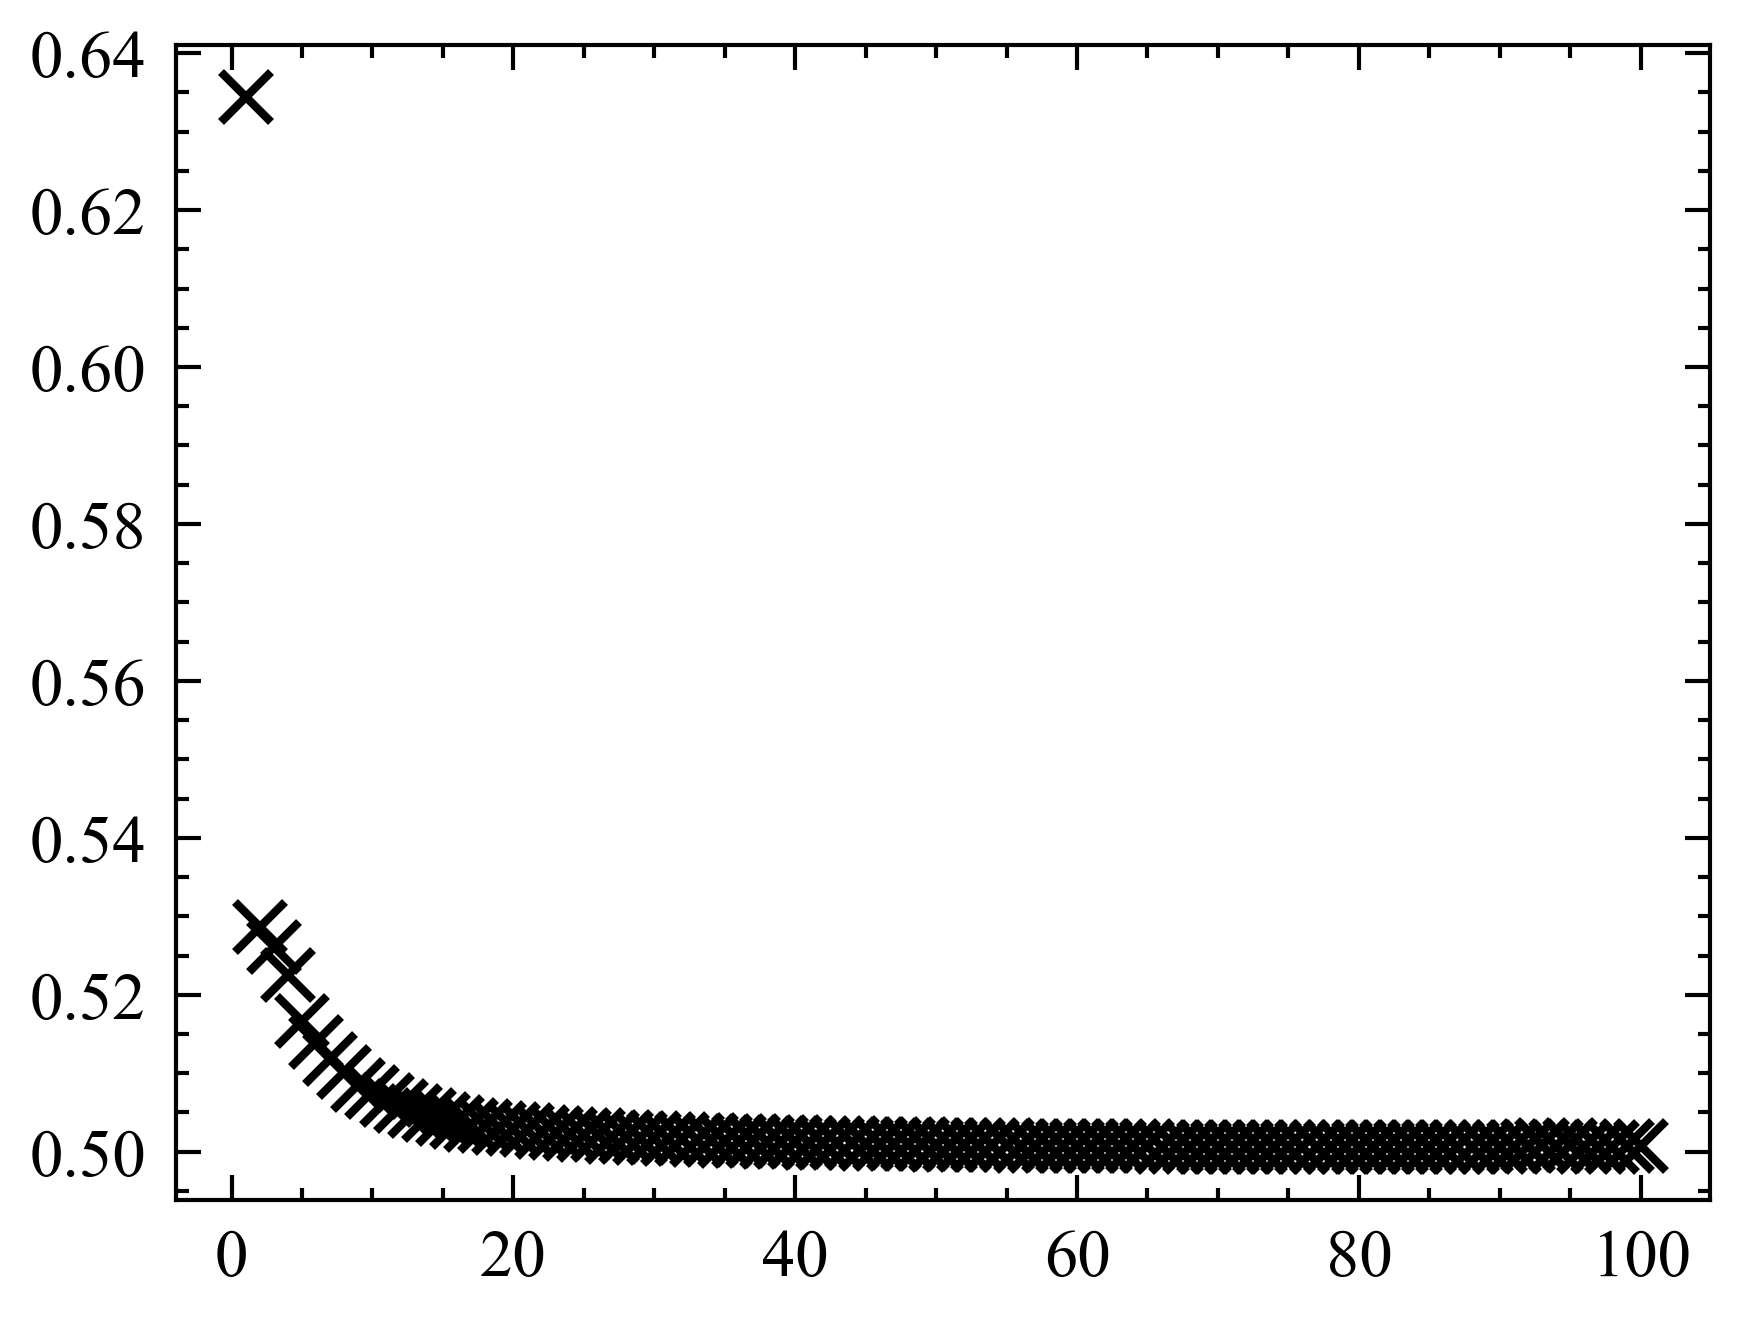

In [223]:
array = []

for i in df_y1y2_bow_al.iloc[0]:
    array.append(i)
x = np.linspace(1,100,100)

plt.plot(x, array[1], 'x')

In [229]:
df_y1y2_bow_al2 = NN_data_invest(X_y1y2_bow_al,y_y1y2_bow_al , 0.8, 100, 20, 8, 1)

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_178 (Dense)           (None, 20)                151280    
                                                                 
 dense_179 (Dense)           (None, 8)                 168       
                                                                 
 dense_180 (Dense)           (None, 1)                 9         
                                                                 
 flatten_60 (Flatten)        (None, 1)                 0         
                                                                 
Total params: 151,457
Trainable params: 151,457
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 [==============================] - 2s 96ms/step - loss: 0.8669 - accuracy: 0.6859 - val_loss: 0.6682 - val_accuracy: 0.8000
Epoch 2/100
5/5 [======================

accuracy    [0.6859155297279358, 0.7957746982574463, 0.749...
loss        [0.8669490814208984, 0.5831437706947327, 0.577...
Name: 0, dtype: object


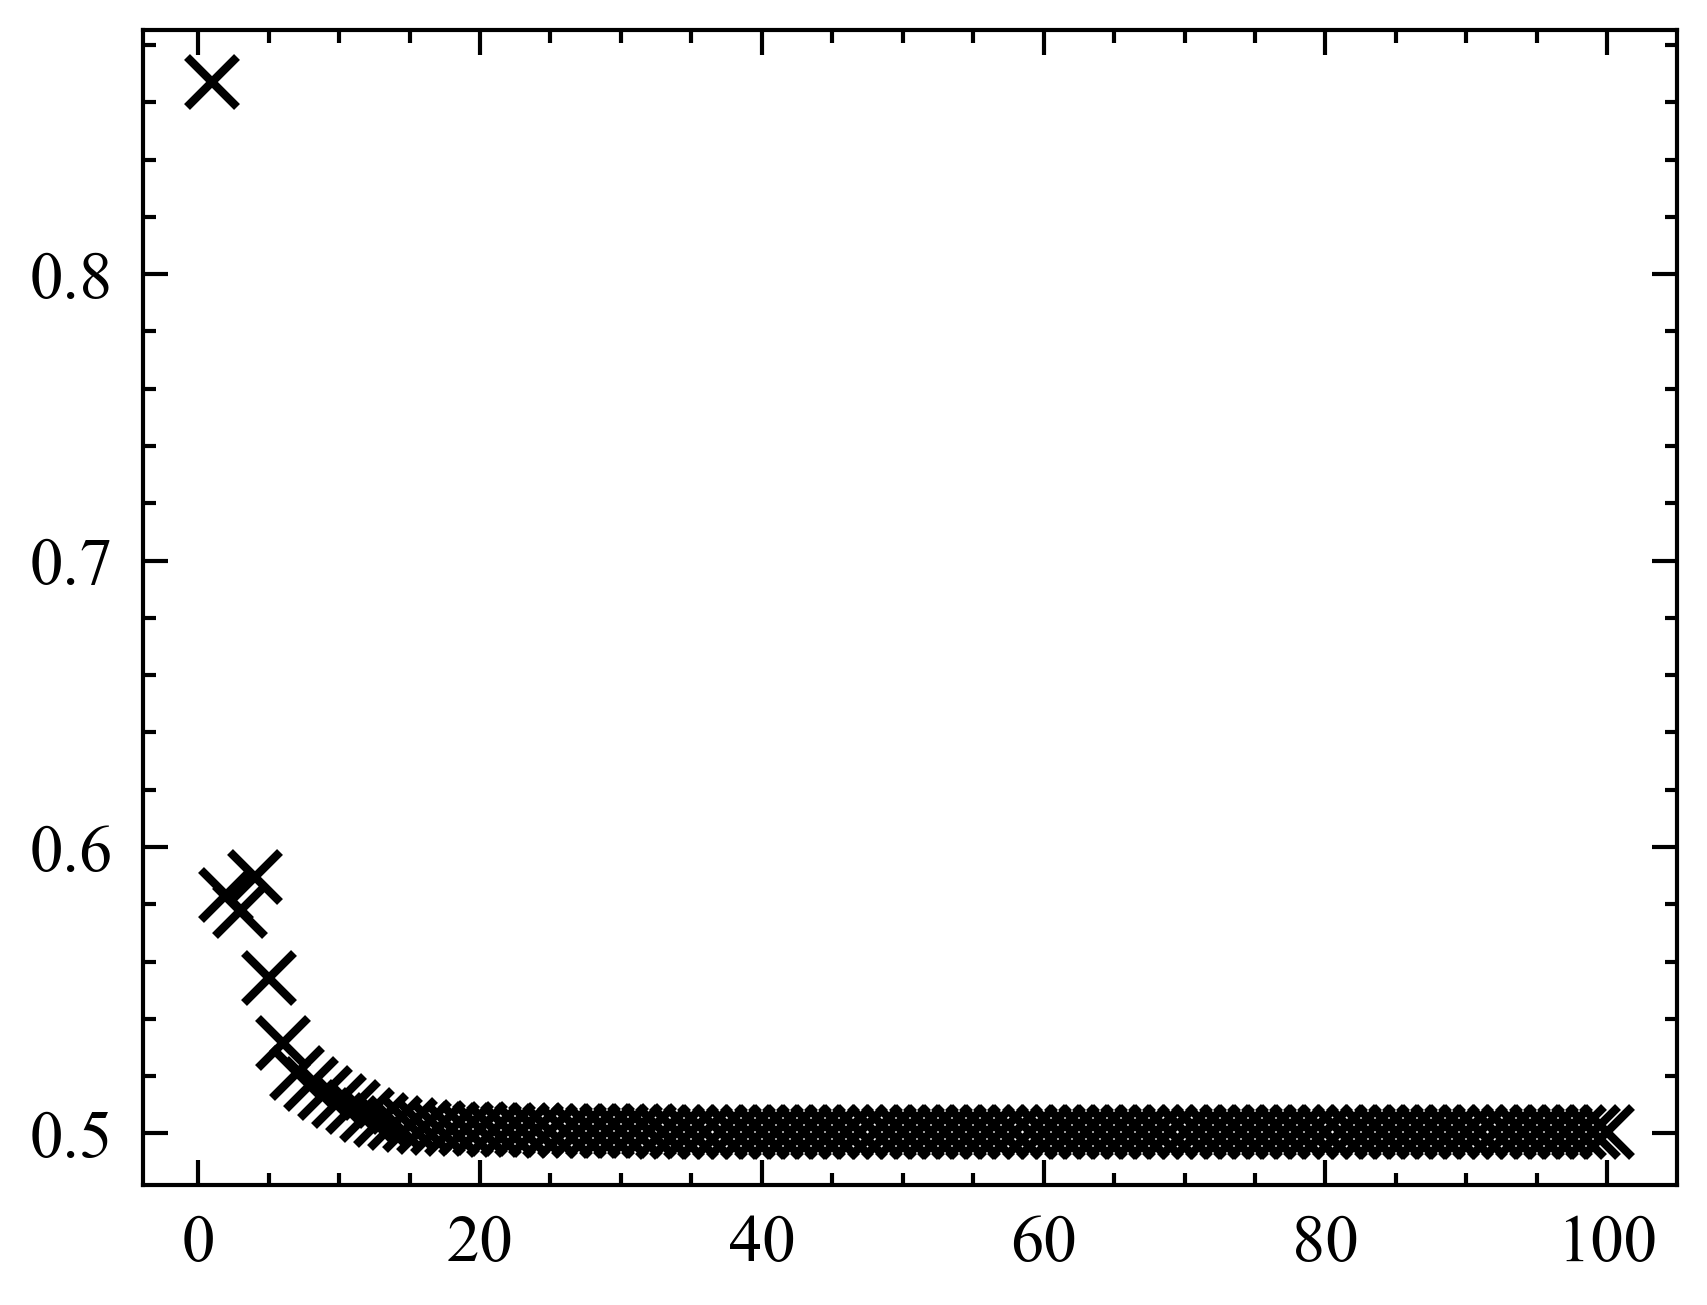

In [238]:

array2 = []

for i in df_y1y2_bow_al2.iloc[0]:
    array2.append(i)

x = np.linspace(1,100,100)
plt.plot(x, array2[1], 'x')

In [248]:
df_y1y2_bow_al3 = NN_data_invest(X_y1y2_bow_al,y_y1y2_bow_al , 0.8, 100, 50, 8, 1)
array3 = []

for i in df_y1y2_bow_al3.iloc[0]:
    array3.append(i)

x = np.linspace(1,100,100)


Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_181 (Dense)           (None, 50)                378200    
                                                                 
 dense_182 (Dense)           (None, 8)                 408       
                                                                 
 dense_183 (Dense)           (None, 1)                 9         
                                                                 
 flatten_61 (Flatten)        (None, 1)                 0         
                                                                 
Total params: 378,617
Trainable params: 378,617
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 [==============================] - 1s 93ms/step - loss: 0.6575 - accuracy: 0.7493 - val_loss: 0.5595 - val_accuracy: 0.8000
Epoch 2/100
5/5 [======================

In [250]:
df_y1y2_bow_al4 = NN_data_invest(X_y1y2_bow_al,y_y1y2_bow_al , 0.8, 100, 150, 8, 1)
array4 = []

for i in df_y1y2_bow_al4.iloc[0]:
    array4.append(i)

x = np.linspace(1,100,100)

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_184 (Dense)           (None, 150)               1134600   
                                                                 
 dense_185 (Dense)           (None, 8)                 1208      
                                                                 
 dense_186 (Dense)           (None, 1)                 9         
                                                                 
 flatten_62 (Flatten)        (None, 1)                 0         
                                                                 
Total params: 1,135,817
Trainable params: 1,135,817
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 [==============================] - 1s 110ms/step - loss: 0.9342 - accuracy: 0.6690 - val_loss: 0.5609 - val_accuracy: 0.7667
Epoch 2/100
5/5 [=================

In [255]:
df_y1y2_bow_al5 = NN_data_invest(X_y1y2_bow_al,y_y1y2_bow_al , 0.8, 100, 150,100, 1)
array5 = []

for i in df_y1y2_bow_al5.iloc[0]:
    array5.append(i)

x = np.linspace(1,100,100)

Model: "sequential_65"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_190 (Dense)           (None, 150)               1134600   
                                                                 
 dense_191 (Dense)           (None, 100)               15100     
                                                                 
 dense_192 (Dense)           (None, 1)                 101       
                                                                 
 flatten_64 (Flatten)        (None, 1)                 0         
                                                                 
Total params: 1,149,801
Trainable params: 1,149,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 [==============================] - 1s 77ms/step - loss: 1.6610 - accuracy: 0.6732 - val_loss: 0.5604 - val_accuracy: 0.7500
Epoch 2/100
5/5 [==================

In [258]:
df_y1y2_bow_al6 = NN_data_invest(X_y1y2_bow_al,y_y1y2_bow_al , 0.8, 100, 5012,100, 1)
array6 = []

for i in df_y1y2_bow_al6.iloc[0]:
    array6.append(i)

x = np.linspace(1,100,100)

Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_196 (Dense)           (None, 5012)              37910768  
                                                                 
 dense_197 (Dense)           (None, 100)               501300    
                                                                 
 dense_198 (Dense)           (None, 1)                 101       
                                                                 
 flatten_66 (Flatten)        (None, 1)                 0         
                                                                 
Total params: 38,412,169
Trainable params: 38,412,169
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 [==============================] - 4s 402ms/step - loss: 2.8816 - accuracy: 0.6817 - val_loss: 3.0850 - val_accuracy: 0.8000
Epoch 2/100
5/5 [===============

Text(0.5, 1.0, ' 0.8 ratio ;100ephs; BOW - Argument Level')

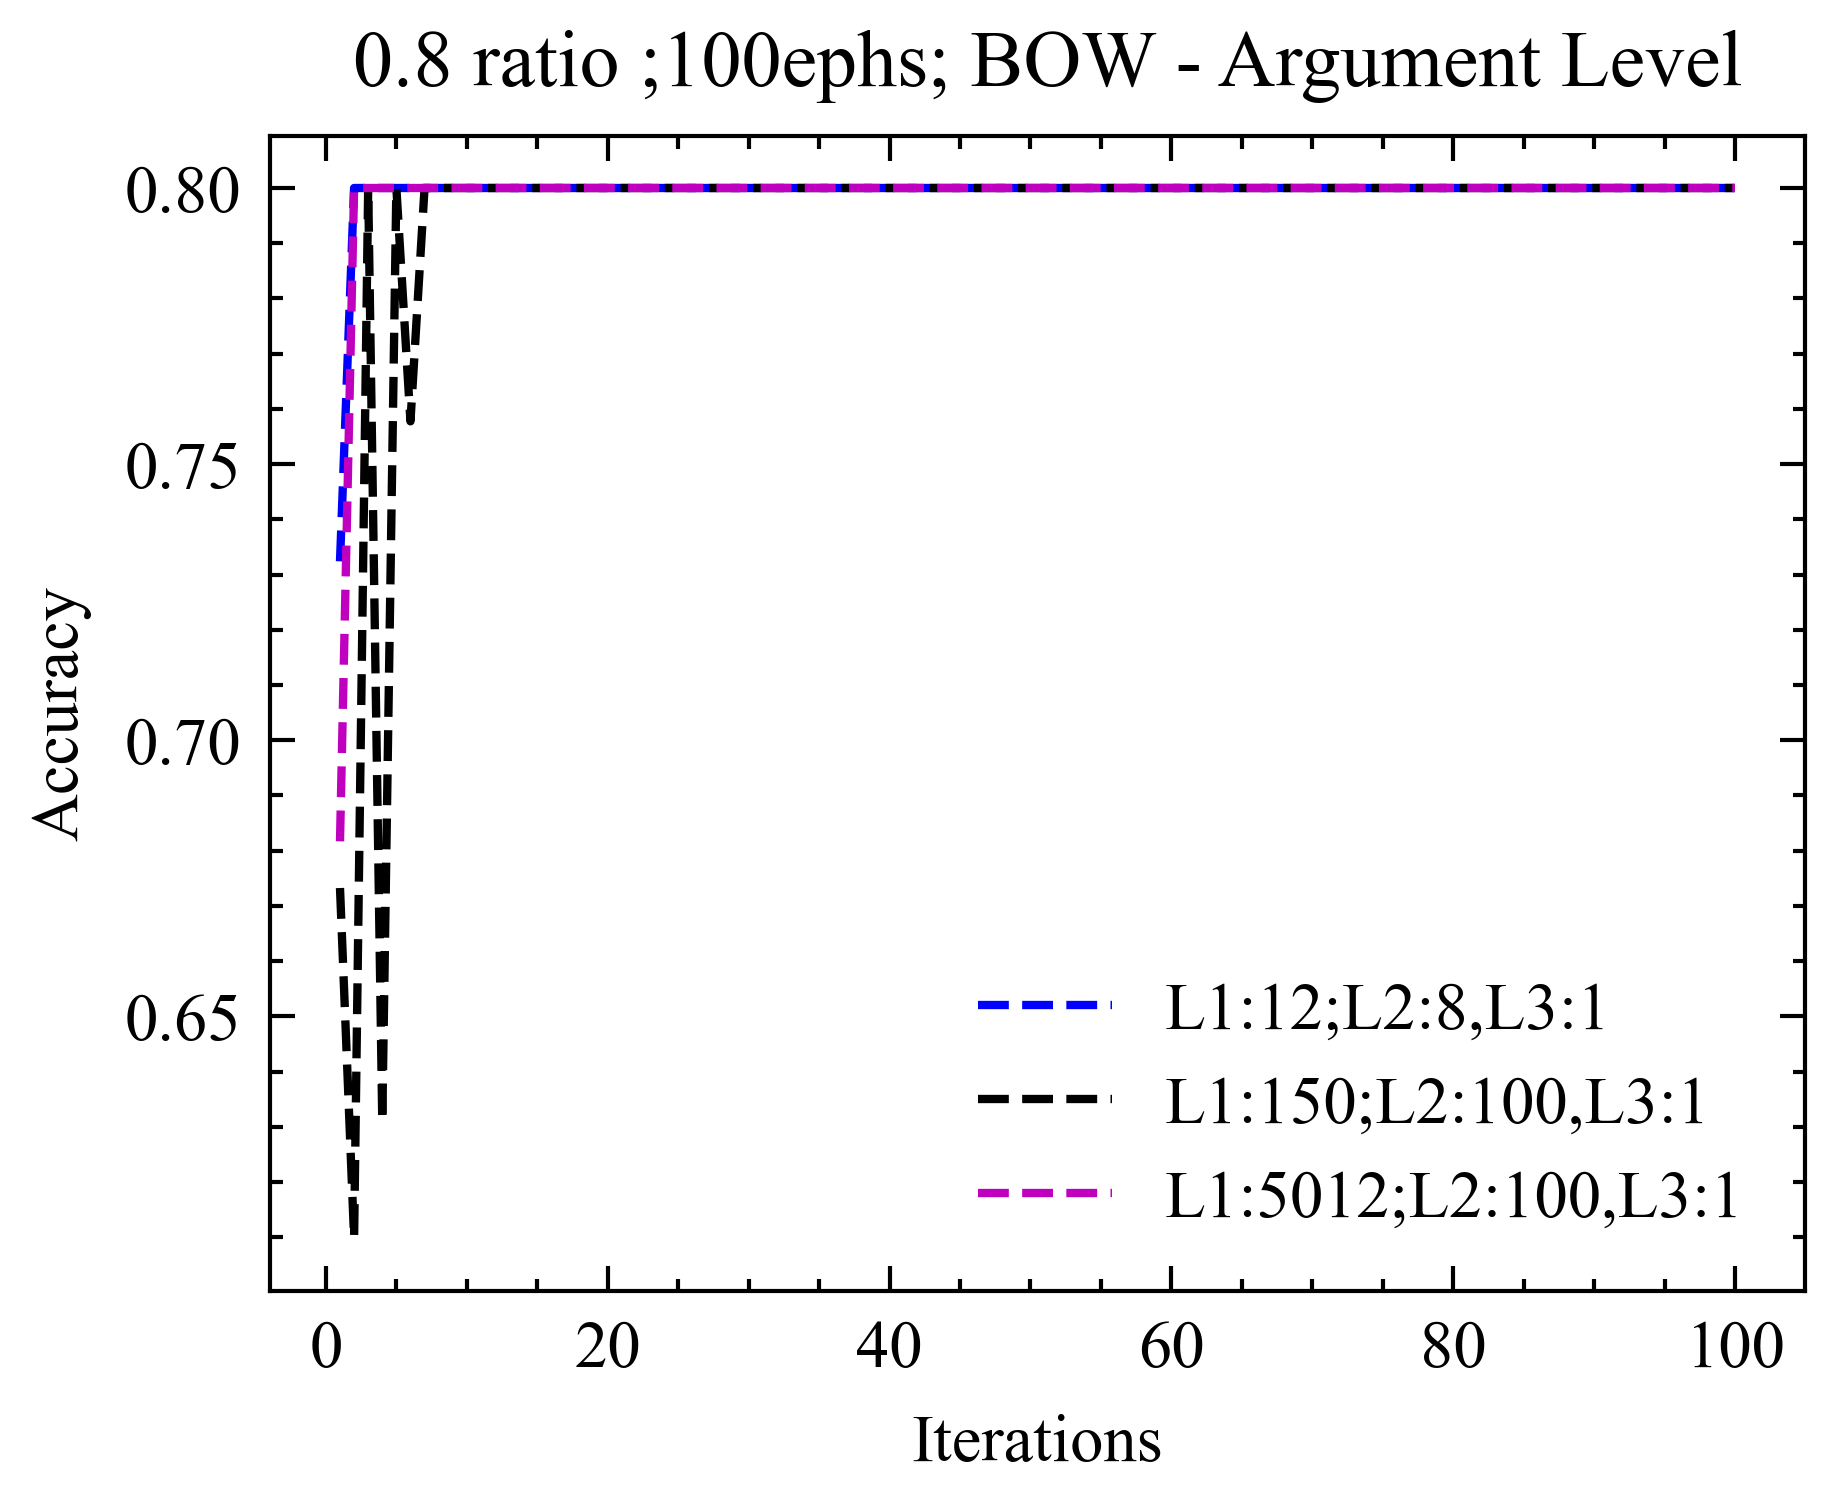

In [277]:
plt.plot(x, array[0], '--',label = 'L1:12;L2:8,L3:1', c = 'b')
#plt.plot(x, array2[0],  '--',label = 'L1:20;L2:8;L3:1')
#plt.plot(x, array3[0], '--', label = 'L1:50;L2:8;L3:1')
#plt.plot(x, array4[0], '--', label = 'L1:150;L2:8,L3:1')
plt.plot(x, array5[0], '--', label = 'L1:150;L2:100,L3:1')
plt.plot(x, array6[0], '--', label = 'L1:5012;L2:100,L3:1', c = 'm')
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.legend()
plt.title(' 0.8 ratio ;100ephs; BOW - Argument Level')

### 2. Changing the number of Layers 

### 3. Hyperparameter Tuning